# BL40A2030 Wireless Communication Networks

## Week 6 - Assignment

### Author: [Niki Malmsten]

**1. (Poisson Point Process) Consider a given region with area $A = 100$ m^2.**

(a) Simulate and plot the histogram of number of points in this area $A$ considering that the density of point is $\lambda = 0.2$ points/m^2.

(b) Compare the simulated histogram with the analytical Poisson distribution.

There isn't a huge difference with the analytical Poisson distribution and simulated histogram. The histogram follows the analytical plot very well.

(c) Present a snapshot of this Point process of this area considering that it is a square with side lenght $L=10$ m.

*Hint: In (a) and (b) there is no need to simulate the position, only the number of points; use the following to define the correct number of bins in the histogram: n_bins = np.max(samples_mean)-np.min(samples_mean) [check tutorial from week 2]. In (c), one snapshot is enough.* 


**2. (Closest-neighbor bound) During this week, the closest neighbor lower-bound of the outage probability when was presented. ** 

(a) What is the outage event and what is the meaning of this outage probability? 

Outage event means that the function used to calculate power capture model is smaller than beta. The outage propability tells the chance for a single realization being bigger os smaller than beta.

(b) Explain why the closest-neighbor is a lower bound of the outage probability?

Because the closest-neighbour jumps to the closest node always, so the outage propability is the smallest it can be, making it the lower bound.

(c) Adapt the code provided in the tutorial to validate the bound as a function of $1< \beta <6$ considering $\lambda = 0.04$ (density of interferers in nodes per m^2), $d=1.5$, $\alpha = 4$.

*Hint: (a) Remember that the Spatial Point Process analysis characterizes events and their probabilities over different spatial realizations*


**3. (Performance analysis) Aggregate Information Efficiency for the bipolar networks:  $\lambda \times d \times (1-P_o) \times \log_2(1+\beta)$ **

(a) Plot the AIE as a function of $1 < \beta <6$ with $d=1.5$, $\alpha = 4$, and $\lambda = 0.05$.

(b) Plot the AIE as a function of $1 < d < 6$ with $\beta= 3$, $\alpha = 4$, and $\lambda = 0.01$.

(c) Plot the AIE as a function of $0.001 < \lambda<0.1$ with $d=1.5$, $\alpha = 4$, and $\beta= 3$.

(d) Comment the trade-offs captured by this metric based on the items (a)-(c).

In a, the trade off comes when beta is in between values 3 and 4. So in between that value the signal to interference ratio is the most optimal with these values and lower or higher than that the efficiency suffers.

In b, the optimal efficiency can be achieved when the distance is between 2 and 3. Higher or lower than that the efficiency suffers.

In c, the optimal efficiency can be achieved with the density being in between 0.04 and 0.06. Lower than that the efficiency will suffer greatly but higher than that the efficiency will not suffer that much.

*Hint: No need to simulate, only plot the mathematical formulation.*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import math
#style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

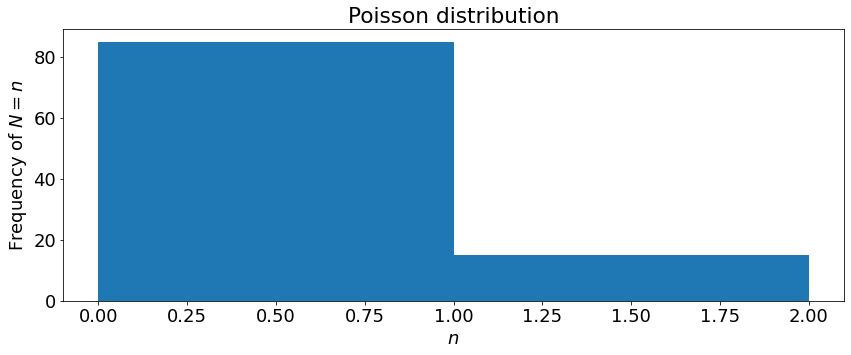

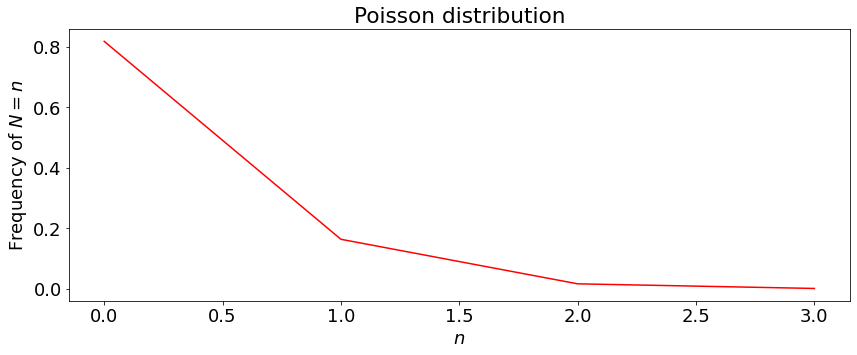

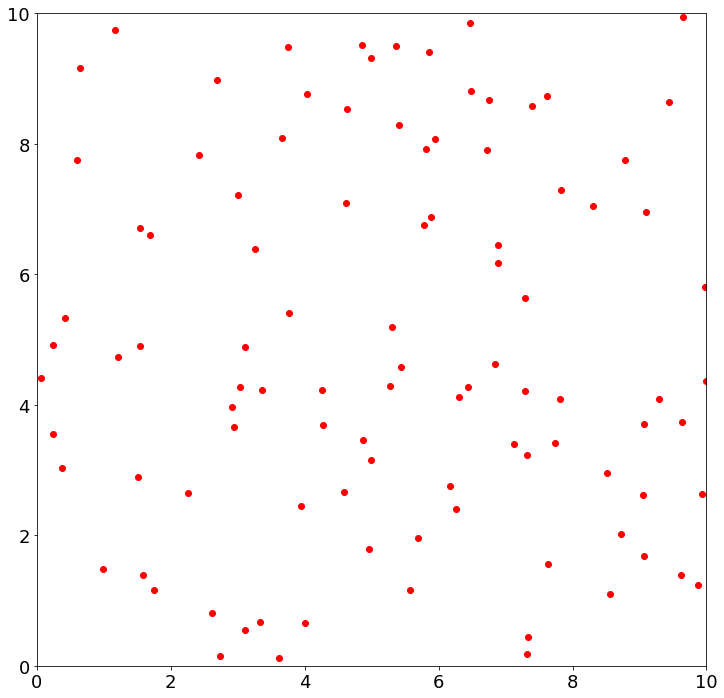

In [15]:
# 1.)
sigma=0.2
size = 100
L = 10

# a.)
samples_mean = np.random.poisson(sigma, size)
n_bins = np.max(samples_mean)-np.min(samples_mean)
plt.figure(figsize=(14,5))
plt.hist(samples_mean,n_bins)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

#b.)
prob = []
y = [x for x in range(4)]
for i in range(4):
    k = i
    prob.append(sigma ** k * np.e ** -sigma / math.factorial(k)) 
plt.figure(figsize=(14,5))
plt.plot(y, prob, 'r')
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

# c.)
position_x_realization = np.random.uniform(0,L,size)
position_y_realization = np.random.uniform(0,L,size)

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12, 12))
plt.plot(position_x_realization, position_y_realization, 'r o')
plt.xlim(0,L)
plt.ylim(0,L)
plt.show()


Text(0.5, 0, 'Value of beta')

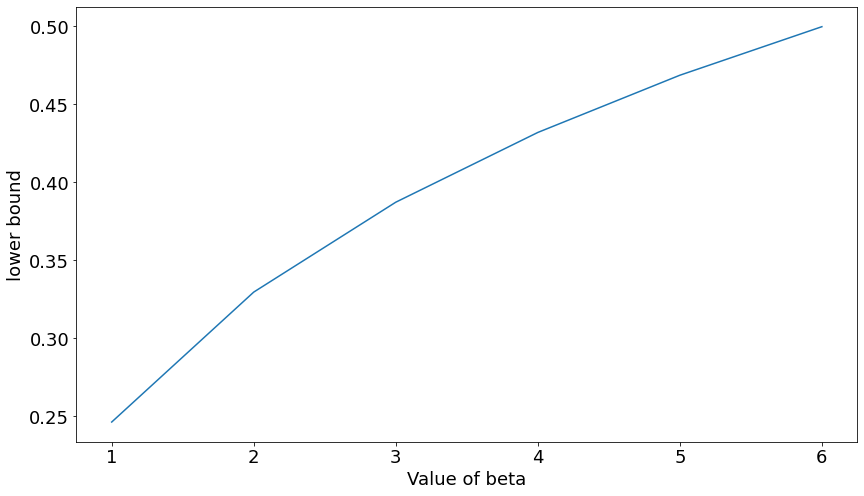

In [71]:
# 2 c.)
d = 1.5
alpha = 4
beta = [x+1 for x in range (6)] 
lam = 0.04
lb = []

for i in range (6):
    lb.append(1 - np.exp(-lam * np.pi * d**2 * beta[i]**(2/alpha)))

plt.figure(figsize=(14,8))
plt.plot(beta, lb)
plt.ylabel("lower bound")
plt.xlabel("Value of beta")

Text(0.5, 0, 'Value of beta')

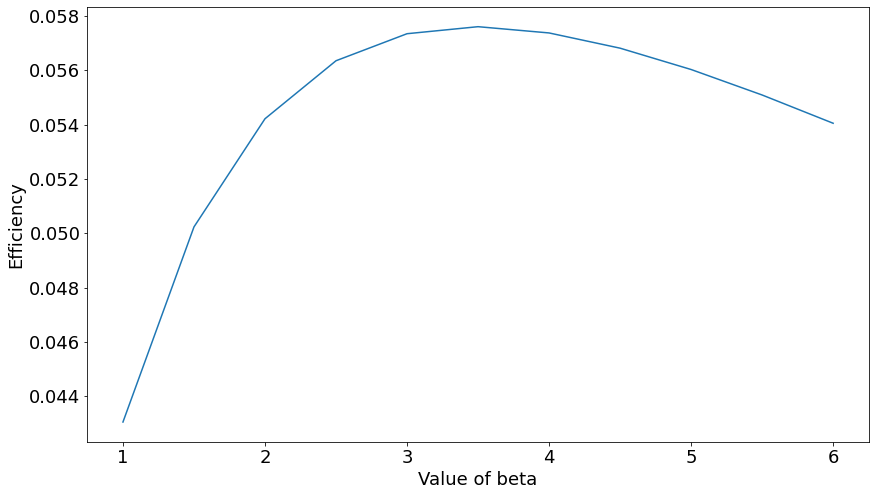

In [63]:
beta = [1+0.5*x for x in range(11)]
d = 1.5
a = 3
alpha = 4
lamb = 0.05
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
AIE = []
for i in range(11):
    AIE.append(lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * beta[i]**(2/alpha))* np.log2(1+beta[i]))

plt.figure(figsize=(14,8))
plt.plot(beta, AIE)
plt.ylabel("Efficiency")
plt.xlabel("Value of beta")

Text(0.5, 0, 'Value of d')

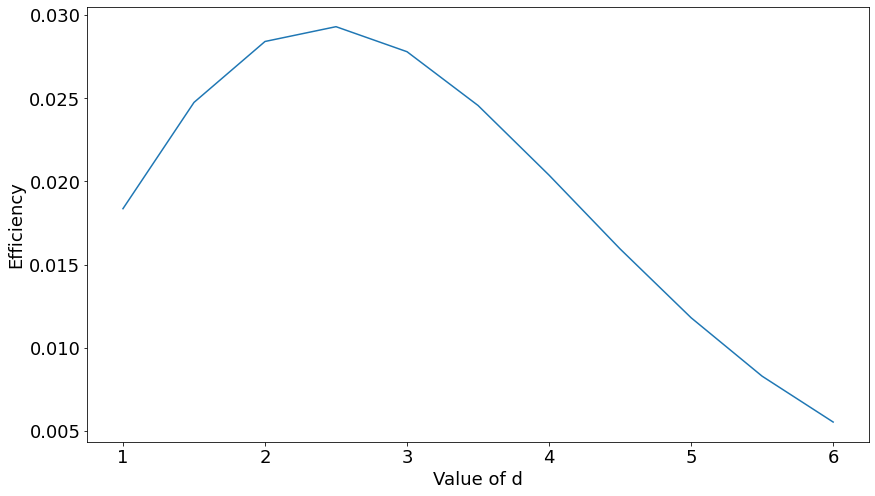

In [62]:
beta = 3
d =  [1+0.5*x for x in range(11)]
a = 3
alpha = 4
lamb = 0.01
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
AIE = []
for i in range(11):
    AIE.append(lamb * d[i] * np.exp(-kappa * lamb * d[i]**2 * np.pi * beta**(2/alpha))* np.log2(1+beta))

plt.figure(figsize=(14,8))
plt.plot(d, AIE)
plt.ylabel("Efficiency")
plt.xlabel("Value of d")

Text(0.5, 0, 'Value of lambda')

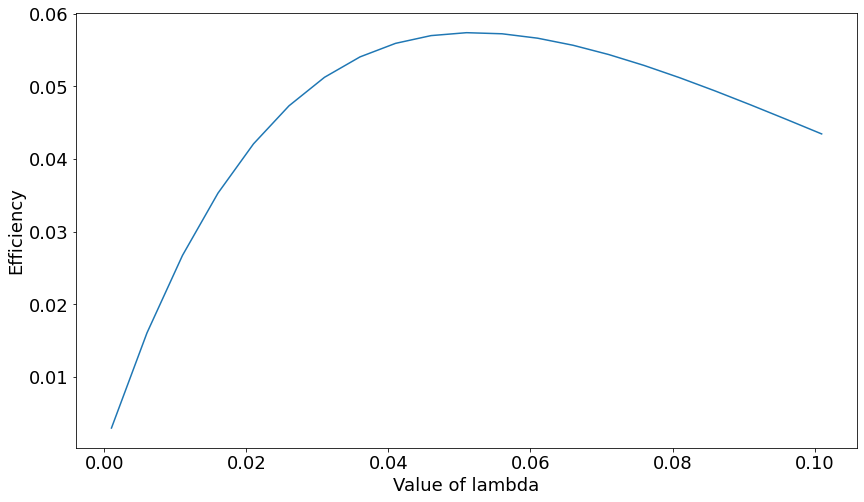

In [70]:
beta = 3
d = 1.5
a = 3
alpha = 4
lamb = [0.005*x+0.001 for x in range(21)]
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
AIE = []
for i in range(21):
    AIE.append(lamb[i] * d * np.exp(-kappa * lamb[i] * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta))

plt.figure(figsize=(14,8))
plt.plot(lamb, AIE)
plt.ylabel("Efficiency")
plt.xlabel("Value of lambda")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc035cc0-996d-4fa3-af0c-6c39ba437636' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>